In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
# Constantes
Nt = 1000
Nx = 50
x = np.linspace(0,1,Nx)
t = np.linspace(0,10,Nt)

dx = x[1] - x[0]
dt = t[1] - t[0]

k = 0.0075

lambda_ = (k*dt)/dx**2
print(lambda_)

0.1802552552552553


In [4]:
def h1(u, D = 0.01, a = 0.2, b = 0.3, e = 0.03):
    return D*dx**2 - u*(u-a)*(1-u)  + 
def h2(D = 0.01, a = 0.2, b = 0.3, e = 0.03):
    return 1

In [5]:
def initU():
    u = np.zeros((Nt, Nx))
    u[:,:] = 0.25
    u[:,0] = 0.1
    u[:,-1] = 0.2
    return u

In [6]:
u = initU()

In [7]:
def GetSolution():
    
    gamma = 2*dt
    
    for l in tqdm(range(1,len(t))):
        
        if l==1:
            u[l,:] = u[l-1,:]
        else:
            
            u[l,0] = h2(t[l])
            
            
            
            for i in range(1,len(x)):
                
                if i != len(x)-1:
            
                    u[l,i] = 2*(1-lambda_**2)*u[l-1,i] + \
                    lambda_**2*(u[l-1,i+1] + u[l-1,i-1]) - \
                    u[l-2,i] \
                    - gamma*u[l-1,i] + gamma*u[l-2,i]
                    
                else:
                    u[l,i] = 2*(1-lambda_**2)*u[l-1,i] + \
                    lambda_**2*(u[l-1,i] + u[l-1,i-1]) - \
                    u[l-2,i] \
                    - gamma*u[l-1,i] + gamma*u[l-2,i]

In [8]:
GetSolution()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 4002.20it/s]


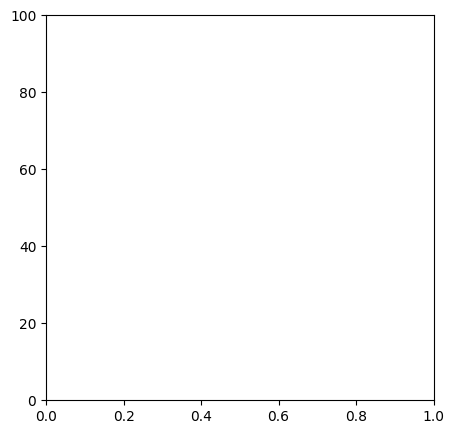

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    
    ax.clear()
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,100)
    
def Update(i):
    
    init()
    ax.plot(x,T[i,:],'--', label=r'T(x,%.2f)' %(t[i]))
    ax.legend()
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

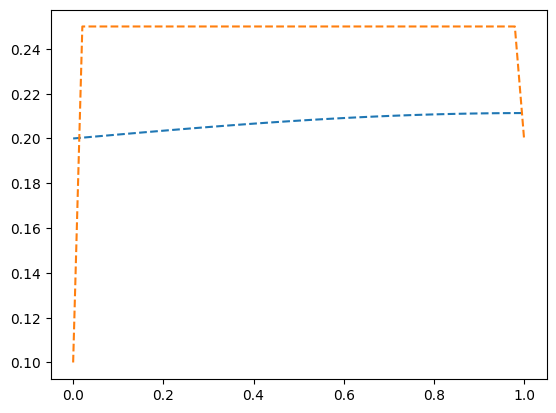

In [12]:
plt.plot(x,u[-1,:],'--')
plt.plot(x,u[0,:],'--')